In [ ]:
!pip install wandb

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist as fm


In [ ]:
import wandb

wandb.login(key='fd85ae65c5e04fb6fea4d31c1180348532db32d6')
wandb_project= 'Assignment_01_EE22M008_dummy4'

wandb: Currently logged in as: ee22m008 (model-mavericks). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
(X, y), (X_test, y_test) = fm.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


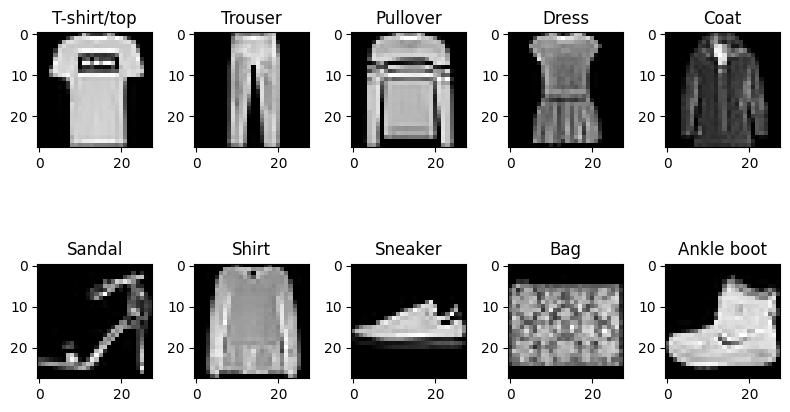

In [ ]:
class_images= np.zeros((10,X[0].shape[0], X[0].shape[1]))
for i in range(10):
  class_images[i, :, :]= X[np.where(y==i)[0][0]]
wandb.init(project=wandb_project)
fig = plt.figure(figsize=(8, 5))
for i, image in enumerate(class_images):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_title(f'{class_names[i]}')
    ax.imshow(image, cmap='gray')
    wandb.log({"img": [wandb.Image(image, caption=class_names[i])]})
plt.tight_layout()
plt.show()

In [ ]:
# Split 80 percent of data to Train Data, and 20 percent to Test Data
def data_split(X, y, size, random_state=None):
  if random_state:
    np.random.seed(random_state)

  # Shuffle indices
  indices = np.arange(len(X))
  np.random.shuffle(indices)

  # Calculate the number of samples for the test set
  num_train_samples = int(len(X) * size)

  # Split indices into train and test sets
  train_indices = indices[:num_train_samples]
  val_indices = indices[num_train_samples:]

  # Split the data based on the indices
  X_train = X[train_indices]
  y_train = y[train_indices]
  X_validate = X[val_indices]
  y_validate = y[val_indices]

  return X_train, y_train, X_validate, y_validate

In [ ]:
# Reshaping the data matrices
X = X.reshape(X.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
# Normalizing the pixel intensities
X = X/255.0
X_test = X_test/255.0

# X_mean= np.mean(X, axis=0)
# X_std= np.std(X, axis=0)
# X= (X-X_mean)/X_std

# X_test_mean= np.mean(X, axis=0)
# X_test_std= np.std(X, axis=0)
# X_test= (X_test-X_test_mean)/X_test_std

# Split the X_train into a training set and validation set
X_train, y_train, X_val, y_val = data_split(X, y, size=0.8, random_state=42)

print("Dimension for the train dataset: ", X_train.shape)
print("Dimension for the validation data: ", X_val.shape)
print("Dimension for the test data: ", X_test.shape)

Dimension for the train dataset:  (48000, 784)
Dimension for the validation data:  (12000, 784)
Dimension for the test data:  (10000, 784)


In [ ]:
no_of_classes= len(class_names)
N_train= X_train.shape[0]
N_val= X_val.shape[0]
N_test= X_test.shape[0]

#one hot encoding
Y_train= np.zeros((no_of_classes, N_train))
Y_val= np.zeros((no_of_classes, N_val))
Y_test= np.zeros((no_of_classes, N_test))

Y_train[y_train, range(N_train)]=1
Y_val[y_val, range(N_val)]=1
Y_test[y_test, range(N_test)]=1

print("Dimension for the train label dataset: ", Y_train.shape)
print("Dimension for the validation label data: ", Y_val.shape)
print("Dimension for the test label data: ", Y_test.shape)

Dimension for the train label dataset:  (10, 48000)
Dimension for the validation label data:  (10, 12000)
Dimension for the test label data:  (10, 10000)


## **Wandb Hyperparameter Sweep**

In [ ]:
!pip install wandb
import wandb
import numpy as np
import matplotlib.pyplot as plt
wandb.login(key='fd85ae65c5e04fb6fea4d31c1180348532db32d6')
wandb_project= 'CS6910_Assignment_01_EE22M008'

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# Split 80 percent of data to Train Data, and 20 percent to Test Data
def data_split(X, y, size, random_state=None):
  if random_state:
    np.random.seed(random_state)

  # Shuffle indices
  indices = np.arange(len(X))
  np.random.shuffle(indices)

  # Calculate the number of samples for the test set
  num_train_samples = int(len(X) * size)

  # Split indices into train and test sets
  train_indices = indices[:num_train_samples]
  val_indices = indices[num_train_samples:]

  # Split the data based on the indices
  X_train = X[train_indices]
  y_train = y[train_indices]
  X_validate = X[val_indices]
  y_validate = y[val_indices]

  return X_train, y_train, X_validate, y_validate

In [ ]:
def Data_Preprocessing(X, y, X_test, y_test, class_names):
  # Reshaping the data matrices
  X = X.reshape(X.shape[0], 784)
  X_test = X_test.reshape(X_test.shape[0], 784)
  # Normalizing the pixel intensities
  X = X/255.0
  X_test = X_test/255.0
  X_train, y_train, X_val, y_val = data_split(X, y, size=0.8, random_state=42)

  no_of_classes= len(class_names)
  N_train= X_train.shape[0]
  N_val= X_val.shape[0]
  N_test= X_test.shape[0]

  #one hot encoding
  Y_train= np.zeros((no_of_classes, N_train))
  Y_val= np.zeros((no_of_classes, N_val))
  Y_test= np.zeros((no_of_classes, N_test))

  Y_train[y_train, range(N_train)]=1
  Y_val[y_val, range(N_val)]=1
  Y_test[y_test, range(N_test)]=1

  X_train= X_train.T
  X_val= X_val.T
  X_test= X_test.T

  return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [ ]:
class Deep_Neural_Networks:
  def __init__(self, weight_init_mode, dimensions, batch_size, af_type, loss_type, learning_rate, lambda_reg):
    self.weight_init_mode= weight_init_mode
    self.af_choice= af_type
    self.loss_type= loss_type
    self.learning_rate= learning_rate
    self.batch_size= batch_size
    self.lambda_reg= lambda_reg
    self.dimensions= dimensions

  def activation_function(self, x):
    if self.af_choice=='sigmoid':
      return 1 / (1 + np.exp(-x))

    elif self.af_choice=='ReLU':
      return np.maximum(0, x)

    elif self.af_choice=='tanh':
      return np.tanh(x)

  def activation_function_derivative(self, x):
    if self.af_choice=='sigmoid':
      sigmoid= lambda x: 1/(1 + np.exp(-x))
      return sigmoid(x) * (1- sigmoid(x))

    elif self.af_choice=='ReLU':
      return 1*(x>0)

    elif self.af_choice=='tanh':
      return 1- (np.tanh(x))**2

  def softmax_function(self, x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

  def softmax_derivative(self, x):
    softmax= lambda x: np.exp(x) / np.sum(np.exp(x), axis=0)
    return softmax(x) * (1-softmax(x))

  def initial_parameters(self):
    parameters= dict()
    for i in range(1,len(self.dimensions)):
      if self.weight_init_mode == 'random':
          parameters["W" + str(i)] = 0.01*np.random.randn(self.dimensions[i], self.dimensions[i-1])  #0.01 is the scaling factor to ensure smaller initialization weights
      elif self.weight_init_mode == 'Xavier':
          parameters["W" + str(i)] = np.random.randn(self.dimensions[i], self.dimensions[i-1])*np.sqrt(2/(self.dimensions[i] + self.dimensions[i-1]))
      parameters["b" + str(i)] = np.zeros((self.dimensions[i],1))
    return parameters

  def compute_true_error(self, y, y_hat, parameters):
    L= len(parameters)//2
    if self.loss_type == 'cross_entropy':
      Loss = - np.sum(y * np.log2(y_hat))/y.shape[1]
    elif self.loss_type == 'mean_squared_error':
      Loss = (1/2) * np.sum((y-y_hat)**2)/y.shape[1]

    penalty = 0                                                               # account for regularization to avoid overfit of data - L2 norm regularization
    for i in range(1,L+1) :
      penalty+= (np.linalg.norm(parameters["W"+str(i)])**2)
    true_error= Loss + (self.lambda_reg/2)*penalty
    return true_error

  def compute_test_error(self, y, y_hat):
    if self.loss_type == 'cross_entropy':
      Loss = - np.sum(y * np.log2(y_hat))/y.shape[1]
    elif self.loss_type == 'mean_squared_error':
      Loss = (1/2) * np.sum((y-y_hat)**2)/y.shape[1]
    return Loss

  def Feed_Forward_Network(self, X_data, parameters):
    L= len(parameters)//2   # Number of layers
    a= [None] * L
    h= [None] * L

    h[0]= X_data # It can be vector (one sample) or can be a matrix (Features x Samples)
    for i in range(1, L):
      a[i-1]= parameters["W" + str(i)] @ h[i-1] + parameters["b" + str(i)]
      h[i]= self.activation_function(a[i-1])
    a[L-1]= parameters["W" + str(L)] @ h[L-1] + parameters["b" + str(L)]
    y_hat= self.softmax_function(a[L-1])
    return y_hat, a, h

  def Back_Propagation(self, y_hat, y, a, h, parameters):
    gradients={}
    L= len(parameters)//2

    if self.loss_type=='cross_entropy':
      gradients["grad(Loss)" + str(L)]= y_hat - y
    elif self.loss_type=='mean_squared_error':
      gradients["grad(Loss)" + str(L)]= (y_hat - y) * self.softmax_derivative(a[L-1])

    for i in range(L, 0, -1):
      gradients["grad_W" + str(i)]= (gradients["grad(Loss)" + str(i)] @  h[i-1].T + self.lambda_reg * parameters["W" + str(i)])/self.batch_size
      gradients['grad_b' + str(i)]= np.sum(gradients["grad(Loss)" + str(i)], axis=1).reshape(-1,1)/ self.batch_size

      if i>1:
        gradients["grad(Loss)" + str(i-1)]= (parameters["W"+str(i)].T @ gradients["grad(Loss)" + str(i)]) * self.activation_function_derivative(a[i-2])
    return gradients

In [ ]:
class model_fit(Deep_Neural_Networks):
  def __init__(self, X_train, Y_train, X_val, Y_val, learning_rate,lambda_reg, af_type, weight_init_mode, optimizer, batch_size, loss_type, epochs, dimensions, beta, beta_1, beta_2, N_n, N_hl):
    self.X_train= X_train
    self.Y_train= Y_train
    self.X_val= X_val
    self.Y_val= Y_val
    self.optimizer= optimizer
    self.epochs= epochs
    self.logs= True
    self.beta=beta
    self.beta_1= beta_1
    self.beta_2= beta_2
    self.t= 1
    self.epsilon=1e-6
    self.run_name= "lr_{}_af_{}_init_{}_opt_{}_bs_{}_L2_{}_ep_{}_nn_{}_nh_{}".format(learning_rate, af_type, weight_init_mode, optimizer, batch_size, lambda_reg, epochs, N_n, N_hl)
    super().__init__(weight_init_mode, dimensions, batch_size, af_type, loss_type, learning_rate, lambda_reg)

  def initial_history(self):
    parameters={}
    for i in range(1, len(self.dimensions)):
      parameters["W" + str(i)]= np.zeros((self.dimensions[i], self.dimensions[i-1]))
      parameters["b" + str(i)]= np.zeros((self.dimensions[i], 1))
    return parameters
  def initial_gradients(self):
    gradients= {}
    for i in range(1, len(self.dimensions)):
      gradients["grad_W" + str(i)] = np.zeros((self.dimensions[i], self.dimensions[i-1]))
      gradients["grad_b" + str(i)] = np.zeros((self.dimensions[i], 1))
    return gradients

  def stochastic_gradient_descent(self):
    parameters=self.initial_parameters()
    L= len(parameters)//2

    for epoch in range(self.epochs):
      for i in range(0, self.X_train.shape[1], self.batch_size):
        y_hat, a, h= self.Feed_Forward_Network(self.X_train[:, i:i+self.batch_size], parameters)
        gradients= self.Back_Propagation(y_hat, self.Y_train[:, i:i+self.batch_size], a, h, parameters)
        for l in range(1, L + 1):
          parameters["W" + str(l)] = parameters["W" + str(l)] - self.learning_rate * gradients["grad_W" + str(l)]
          parameters["b" + str(l)] = parameters["b" + str(l)] - self.learning_rate * gradients["grad_b" + str(l)]

      if self.logs==True:
        Y_hat_train, _, _= self.Feed_Forward_Network(self.X_train, parameters)
        loss_train= self.compute_true_error(self.Y_train, Y_hat_train, parameters)
        Y_hat_val,_,_= self.Feed_Forward_Network(self.X_val, parameters)
        loss_val= self.compute_test_error(self.Y_val, Y_hat_val)

        # Compute the accuracy on the test set
        train_acc = (np.argmax(self.Y_train, axis=0) == np.argmax(Y_hat_train, axis=0)).mean() *100
        validation_acc= (np.argmax(self.Y_val, axis=0) == np.argmax(Y_hat_val, axis=0)).mean() *100

        wandb.log({"Accuracy_Train":train_acc,"Loss_Train":loss_train,"Accuracy_val":validation_acc,"Loss_val": loss_val})
    return parameters

  def momentum_gradient_descent(self):
    parameters=self.initial_parameters()
    L= len(parameters)//2
    update_history= self.initial_history()
    for epoch in range(self.epochs):
      for i in range(0, self.X_train.shape[1], self.batch_size):
        y_hat, a, h= self.Feed_Forward_Network(self.X_train[:, i:i+self.batch_size], parameters)
        gradients= self.Back_Propagation(y_hat, self.Y_train[:, i:i+self.batch_size], a, h, parameters)

        for l in range(1, L + 1):
          update_history["W" + str(l)]= self.beta*update_history["W" + str(l)] + gradients["grad_W" + str(l)]
          update_history["b" + str(l)]= self.beta*update_history["b" + str(l)] + gradients["grad_b" + str(l)]
          parameters["W" + str(l)] = parameters["W" + str(l)] - self.learning_rate*update_history["W" + str(l)]
          parameters["b" + str(l)] = parameters["b" + str(l)] - self.learning_rate*update_history["b" + str(l)]

      if self.logs==True:
        Y_hat_train, _, _= self.Feed_Forward_Network(self.X_train, parameters)
        loss_train= self.compute_true_error(self.Y_train, Y_hat_train, parameters)
        Y_hat_val,_,_= self.Feed_Forward_Network(self.X_val, parameters)
        loss_val= self.compute_test_error(self.Y_val, Y_hat_val)

        # Compute the accuracy on the test set
        train_acc = (np.argmax(self.Y_train, axis=0) == np.argmax(Y_hat_train, axis=0)).mean() *100
        validation_acc= (np.argmax(self.Y_val, axis=0) == np.argmax(Y_hat_val, axis=0)).mean() *100

        wandb.log({"Accuracy_Train":train_acc,"Loss_Train":loss_train,"Accuracy_val":validation_acc,"Loss_val": loss_val})
    return parameters

  def nestorov_gradient_descent(self):
    look_ahead=dict()
    parameters=self.initial_parameters()
    L= len(parameters)//2
    update_history= self.initial_history()
    for epoch in range(self.epochs):
      for i in range(0, self.X_train.shape[1], self.batch_size):
        for l in range(1, L+1):
          look_ahead["W" + str(l)] = parameters["W" + str(l)] - self.beta*update_history["W" + str(l)]
          look_ahead["b" + str(l)] = parameters["b" + str(l)] - self.beta*update_history["b" + str(l)]
        y_hat, a, h= self.Feed_Forward_Network(self.X_train[:, i:i+self.batch_size], look_ahead)
        gradients= self.Back_Propagation(y_hat, self.Y_train[:, i:i+self.batch_size], a, h, look_ahead)

        for l in range(1, L + 1):
          update_history["W" + str(l)]= self.beta*update_history["W" + str(l)] + gradients["grad_W" + str(l)]
          update_history["b" + str(l)]= self.beta*update_history["b" + str(l)] + gradients["grad_b" + str(l)]
          parameters["W" + str(l)] = parameters["W" + str(l)] - self.learning_rate*update_history["W" + str(l)]
          parameters["b" + str(l)] = parameters["b" + str(l)] - self.learning_rate*update_history["b" + str(l)]

      if self.logs==True:
        Y_hat_train, _, _= self.Feed_Forward_Network(self.X_train, parameters)
        loss_train= self.compute_true_error(self.Y_train, Y_hat_train, parameters)
        Y_hat_val,_,_= self.Feed_Forward_Network(self.X_val, parameters)
        loss_val= self.compute_test_error(self.Y_val, Y_hat_val)

        # Compute the accuracy on the test set
        train_acc = (np.argmax(self.Y_train, axis=0) == np.argmax(Y_hat_train, axis=0)).mean() *100
        validation_acc= (np.argmax(self.Y_val, axis=0) == np.argmax(Y_hat_val, axis=0)).mean() *100

        wandb.log({"Accuracy_Train":train_acc,"Loss_Train":loss_train,"Accuracy_val":validation_acc,"Loss_val": loss_val})
    return parameters

  def RMSprop_Gradient_Descent(self):
    parameters=self.initial_parameters()
    L= len(parameters)//2
    update_history= self.initial_history()
    for epoch in range(self.epochs):
      for i in range(0, self.X_train.shape[1], self.batch_size):
        y_hat, a, h= self.Feed_Forward_Network(self.X_train[:, i:i+self.batch_size], parameters)
        gradients= self.Back_Propagation(y_hat, self.Y_train[:, i:i+self.batch_size], a, h, parameters)
        for l in range(1, L + 1):
          update_history["W" + str(l)]= self.beta*update_history["W" + str(l)] + (1-self.beta)*gradients["grad_W" + str(l)]**2
          update_history["b" + str(l)]= self.beta*update_history["b" + str(l)] + (1-self.beta)*gradients["grad_b" + str(l)]**2
          parameters["W" + str(l)] = parameters["W" + str(l)] - self.learning_rate*gradients["grad_W" + str(l)]/(np.sqrt(update_history["W" + str(l)] + self.epsilon))
          parameters["b" + str(l)] = parameters["b" + str(l)] - self.learning_rate*gradients["grad_b" + str(l)]/(np.sqrt(update_history["b" + str(l)] + self.epsilon))

      if self.logs==True:
        Y_hat_train, _, _= self.Feed_Forward_Network(self.X_train, parameters)
        loss_train= self.compute_true_error(self.Y_train, Y_hat_train, parameters)
        Y_hat_val,_,_= self.Feed_Forward_Network(self.X_val, parameters)
        loss_val= self.compute_test_error(self.Y_val, Y_hat_val)

        # Compute the accuracy on the test set
        train_acc = (np.argmax(self.Y_train, axis=0) == np.argmax(Y_hat_train, axis=0)).mean() *100
        validation_acc= (np.argmax(self.Y_val, axis=0) == np.argmax(Y_hat_val, axis=0)).mean() *100

        wandb.log({"Accuracy_Train":train_acc,"Loss_Train":loss_train,"Accuracy_val":validation_acc,"Loss_val": loss_val})
    return parameters

  def Adam(self):
    parameters=self.initial_parameters()
    L= len(parameters)//2
    update_history= self.initial_history()
    momentum= self.initial_history()
    for epoch in range(self.epochs):
      for i in range(0, self.X_train.shape[1], self.batch_size):
        y_hat, a, h= self.Feed_Forward_Network(self.X_train[:, i:i+self.batch_size], parameters)
        gradients= self.Back_Propagation(y_hat, self.Y_train[:, i:i+self.batch_size], a, h, parameters)
        for i in range(1, L+1):
          momentum["W" + str(i)] = self.beta_1*momentum["W"+str(i)] + (1-self.beta_1)*gradients["grad_W"+str(i)]
          momentum["b" + str(i)] = self.beta_1*momentum["b"+str(i)] + (1-self.beta_1)*gradients["grad_b"+str(i)]
          momentum_w_hat = momentum["W" + str(i)]/(1.0 - self.beta_1**(epoch+1))
          momentum_b_hat = momentum["b" + str(i)]/(1.0 - self.beta_1**(epoch+1))

          update_history["W" + str(i)] = self.beta_2*update_history["W"+str(i)] + (1-self.beta_2)*gradients["grad_W"+str(i)]**2
          update_history["b" + str(i)] = self.beta_2*update_history["b"+str(i)] + (1-self.beta_2)*gradients["grad_b"+str(i)]**2
          update_history_w_hat = update_history["W" + str(i)]/(1.0 - self.beta_2**(epoch+1))
          update_history_b_hat = update_history["b" + str(i)]/(1.0 - self.beta_2**(epoch+1))

          parameters["W"+str(i)] = parameters["W"+str(i)] - (self.learning_rate * momentum_w_hat)/np.sqrt(update_history_w_hat + self.epsilon)
          parameters["b"+str(i)] = parameters["b"+str(i)] - (self.learning_rate * momentum_b_hat)/np.sqrt(update_history_b_hat + self.epsilon)

      if self.logs==True:
        Y_hat_train, _, _= self.Feed_Forward_Network(self.X_train, parameters)
        loss_train= self.compute_true_error(self.Y_train, Y_hat_train, parameters)
        Y_hat_val,_,_= self.Feed_Forward_Network(self.X_val, parameters)
        loss_val= self.compute_test_error(self.Y_val, Y_hat_val)

        # Compute the accuracy on the test set
        train_acc = (np.argmax(self.Y_train, axis=0) == np.argmax(Y_hat_train, axis=0)).mean() *100
        validation_acc= (np.argmax(self.Y_val, axis=0) == np.argmax(Y_hat_val, axis=0)).mean() *100

        wandb.log({"Accuracy_Train":train_acc,"Loss_Train":loss_train,"Accuracy_val":validation_acc,"Loss_val": loss_val})
    return parameters
  def Nestorov_Adam(self):
    look_ahead=dict()
    parameters=self.initial_parameters()
    L= len(parameters)//2
    update_history= self.initial_history()
    momentum= self.initial_history()
    for epoch in range(self.epochs):
      for i in range(0, self.X_train.shape[1], self.batch_size):
        for l in range(1, L+1):
          look_ahead["W" + str(l)] = parameters["W" + str(l)] - self.beta*update_history["W" + str(l)]
          look_ahead["b" + str(l)] = parameters["b" + str(l)] - self.beta*update_history["b" + str(l)]
        y_hat, a, h= self.Feed_Forward_Network(self.X_train[:, i:i+self.batch_size], look_ahead)
        gradients= self.Back_Propagation(y_hat, self.Y_train[:, i:i+self.batch_size], a, h, look_ahead)

        for i in range(1, L+1):
          momentum["W" + str(i)] = self.beta_1*momentum["W"+str(i)] + (1-self.beta_1)*gradients["grad_W"+str(i)]
          momentum["b" + str(i)] = self.beta_1*momentum["b"+str(i)] + (1-self.beta_1)*gradients["grad_b"+str(i)]
          momentum_w_hat = momentum["W" + str(i)]/(1.0 - self.beta_1**(epoch+1))
          momentum_b_hat = momentum["b" + str(i)]/(1.0 - self.beta_1**(epoch+1))

          update_history["W" + str(i)] = self.beta_2*update_history["W"+str(i)] + (1-self.beta_2)*gradients["grad_W"+str(i)]**2
          update_history["b" + str(i)] = self.beta_2*update_history["b"+str(i)] + (1-self.beta_2)*gradients["grad_b"+str(i)]**2
          update_history_w_hat = update_history["W" + str(i)]/(1.0 - self.beta_2**(epoch+1))
          update_history_b_hat = update_history["b" + str(i)]/(1.0 - self.beta_2**(epoch+1))

          parameters["W"+str(i)] = parameters["W"+str(i)] - (self.learning_rate * momentum_w_hat)/np.sqrt(update_history_w_hat + self.epsilon)
          parameters["b"+str(i)] = parameters["b"+str(i)] - (self.learning_rate * momentum_b_hat)/np.sqrt(update_history_b_hat + self.epsilon)

      if self.logs==True:
        Y_hat_train, _, _= self.Feed_Forward_Network(self.X_train, parameters)
        loss_train= self.compute_true_error(self.Y_train, Y_hat_train, parameters)
        Y_hat_val,_,_= self.Feed_Forward_Network(self.X_val, parameters)
        loss_val= self.compute_test_error(self.Y_val, Y_hat_val)

        # Compute the accuracy on the test set
        train_acc = (np.argmax(self.Y_train, axis=0) == np.argmax(Y_hat_train, axis=0)).mean() *100
        validation_acc= (np.argmax(self.Y_val, axis=0) == np.argmax(Y_hat_val, axis=0)).mean() *100

        wandb.log({"Accuracy_Train":train_acc,"Loss_Train":loss_train,"Accuracy_val":validation_acc,"Loss_val": loss_val})
    return parameters

  def fit(self):
    if self.optimizer=='sgd':
      parameters= self.stochastic_gradient_descent()
    elif self.optimizer=='momentum':
      parameters= self.momentum_gradient_descent()
    elif self.optimizer=='nag':
      parameters= self.nestorov_gradient_descent()
    elif self.optimizer=='rmsprop':
      parameters= self.RMSprop_Gradient_Descent()
    elif self.optimizer=='adam':
      parameters= self.Adam()
    elif self.optimizer=='nadam':
      parameters= self.Nestorov_Adam()
    wandb.run.name = self.run_name
    wandb.run.save()
    wandb.run.finish()
    return parameters

In [ ]:
def wandb_model():
  wandb.init(project= wandb_project)
  config=wandb.config

  dataset_type= config.dataset
  if dataset_type=='fashion_mnist':
    from keras.datasets import fashion_mnist
    (X, y), (X_test, y_test) = fashion_mnist.load_data()
    class_names= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    X_train, X_val, X_test, Y_train, Y_val, Y_test= Data_Preprocessing(X, y, X_test, y_test, class_names)
  elif dataset_type=='mnist':
    from keras.datasets import mnist
    (X, y), (X_test, y_test) = mnist.load_data()
    class_names= ['No: 0', 'No: 1', 'No: 2', 'No: 3', 'No: 4', 'No: 5', 'No: 6', 'No: 7', 'No: 8', 'No: 9']
    X_train, X_val, X_test, Y_train, Y_val, Y_test= Data_Preprocessing(X, y, X_test, y_test, class_names)
  beta, beta_1, beta_2= 0.5, 0.5, 0.5
  K_classes= len(class_names)
  N_features= X_train.shape[0]
  dimensions= [N_features] + [config.hidden_size]*config.num_layers + [K_classes]
  fit_model = model_fit(X_train, Y_train, X_val, Y_val, config.learning_rate, config.weight_decay, config.activation, config.weight_init_mode, config.optimizer, config.batch_size, config.loss, config.epochs, dimensions, beta, beta_1, beta_2, config.hidden_size, config.num_layers)
  parameters= fit_model.fit()

In [ ]:
def sweeper(sweep_config,proj_name):
  sweep_id=wandb.sweep(sweep_config,project=wandb_project)
  wandb.agent(sweep_id,wandb_model,project=wandb_project, count=50)

In [ ]:
sweep_config = {
  "name": "Assignment 01 EE22M008",
  "metric": {
      "name":"Accuracy_val",
      "goal": "maximize"
  },
  "method": "random",
  "parameters": {
        "learning_rate": {
            "values": [0.001, 0.0001]
        },
        "loss": {
            "values": ['cross_entropy', 'mean_squared_error']
        },
        "dataset": {
            "values": ['fashion_mnist']
        },
        "activation": {
            "values": ["sigmoid", "ReLU", "tanh"]
        },
        "weight_init_mode": {
            "values": ["random", "Xavier"]
        },
        "optimizer": {
            "values": ["sgd", "momentum", "nag", "adam", "nadam", "rmsprop"]
        },
        "batch_size": {
            "values": [16, 32, 64]
        },
        "epochs": {
            "values": [5, 10]
        },
        "weight_decay": {
            "values": [0, 0.0005, 0.5]
        },
        "hidden_size": {
            "values": [32, 64, 128]
        },
        "num_layers": {
            "values": [3, 4, 5]
        }
    }
}

In [ ]:
sweeper(sweep_config,wandb_project)

Create sweep with ID: lmsp2sn8
Sweep URL: https://wandb.ai/model-mavericks/CS6910_Assignment_01_EE22M008/sweeps/lmsp2sn8


wandb: Agent Starting Run: vk8cw1p2 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


Accuracy_Train,▁▅▇██
Accuracy_val,▁▅▇▇█
Loss_Train,█▄▂▁▁
Loss_val,█▃▁▁▁
Accuracy_Train,87.45833
Accuracy_val,85.88333
Loss_Train,0.50728
Loss_val,0.57974


wandb: Agent Starting Run: j54ypcf9 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▆▇▇█
Accuracy_val,▁▅▇▇█
Loss_Train,█▄▂▂▁
Loss_val,█▄▃▂▁
Accuracy_Train,84.20625
Accuracy_val,83.54167
Loss_Train,0.25106
Loss_val,0.1197


wandb: Agent Starting Run: ng8rjy1w with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▄▆▇▇▇████
Accuracy_val,▁▃▅▇▇▇████
Loss_Train,▁▄▅▆▇▇▇███
Loss_val,█▆▄▂▂▂▁▁▁▁
Accuracy_Train,84.74792
Accuracy_val,83.88333
Loss_Train,14.63647
Loss_val,0.67311


wandb: Agent Starting Run: t6ffuxzq with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 4
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▆▇██
Accuracy_val,▁▆▇██
Loss_Train,█▆▄▃▁
Loss_val,█▅▃▂▁
Accuracy_Train,65.92917
Accuracy_val,65.41667
Loss_Train,100.03309
Loss_val,0.27151


wandb: Agent Starting Run: 5cy1zpzj with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,█▁▂▃▄
Accuracy_val,█▁▂▃▄
Loss_Train,█▁▂▂▃
Loss_val,▁█▇▆▅
Accuracy_Train,31.9875
Accuracy_val,31.98333
Loss_Train,1.68554
Loss_val,0.37246


wandb: Agent Starting Run: uc43rbzg with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 3
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁▁▁▁▁▁
Accuracy_val,▁▁▁▁▁▁▁▁▁▁
Loss_Train,█▇▆▅▅▄▃▂▂▁
Loss_val,█▇▆▅▄▃▃▂▂▁
Accuracy_Train,9.95833
Accuracy_val,10.16667
Loss_Train,24.8647
Loss_val,0.45386


wandb: Agent Starting Run: fecbxuyb with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▄▇██
Accuracy_val,▁▄▆██
Loss_Train,█▆▄▃▁
Loss_val,█▅▃▂▁
Accuracy_Train,24.72708
Accuracy_val,24.86667
Loss_Train,118.39297
Loss_val,0.44212


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: o8s5ogua with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁
Accuracy_val,▁▁▁▁▁
Loss_Train,█▁▁▁▁
Loss_val,▁▄▅▇█
Accuracy_Train,10.03125
Accuracy_val,9.875
Loss_Train,3.32192
Loss_val,3.32199


wandb: Agent Starting Run: jvg55t84 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 4
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁
Accuracy_val,▁▁▁▁▁
Loss_Train,██▅▅▁
Loss_val,▁▃▆▆█
Accuracy_Train,10.03542
Accuracy_val,9.85833
Loss_Train,0.45072
Loss_val,0.45


wandb: Agent Starting Run: ik5jauou with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 4
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁▁▁▁▁▁
Accuracy_val,▁▁▁▁▁▁▁▁▁▁
Loss_Train,█▇▆▅▄▃▂▂▁▁
Loss_val,█▇▅▄▄▃▂▂▁▁
Accuracy_Train,9.98333
Accuracy_val,10.06667
Loss_Train,3.32282
Loss_val,3.32199


wandb: Agent Starting Run: c0jvwfb8 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▆▇▇█
Accuracy_val,▁▆▆▇█
Loss_Train,▄▁▅▅█
Loss_val,█▂▂▁▁
Accuracy_Train,53.58125
Accuracy_val,53.58333
Loss_Train,22.3969
Loss_val,0.2839


wandb: Agent Starting Run: p3mbtlka with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▄▆▇█
Accuracy_val,▁▄▆▇█
Loss_Train,█▄▃▂▁
Loss_val,█▄▃▂▁
Accuracy_Train,86.68333
Accuracy_val,85.71667
Loss_Train,0.62188
Loss_val,0.58458


wandb: Agent Starting Run: q2rd7i3o with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 4
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▃▄▅▆▇▇▇██
Accuracy_val,▁▃▅▇▇▇▇▇▇█
Loss_Train,█▃▂▂▁▁▁▁▁▁
Loss_val,█▅▄▃▃▂▂▂▁▁
Accuracy_Train,85.05208
Accuracy_val,84.08333
Loss_Train,17.86721
Loss_val,0.66852


wandb: Agent Starting Run: mdtnr2tr with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▅▅▇█
Accuracy_val,▁▅▅▇█
Loss_Train,▁▃▄▅█
Loss_val,█▄▃▂▁
Accuracy_Train,79.78542
Accuracy_val,78.925
Loss_Train,0.48935
Loss_val,0.14395


wandb: Agent Starting Run: xsgd4cnw with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁▁▁▁▁▁
Accuracy_val,▁▁▁▁▁▁▁▁▁▁
Loss_Train,█▇▆▅▅▄▃▂▂▁
Loss_val,▁█████████
Accuracy_Train,9.99792
Accuracy_val,10.00833
Loss_Train,5.93161
Loss_val,3.32209


wandb: Agent Starting Run: u2tbfcxr with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▅▇▇█
Accuracy_val,▁▅▇▇█
Loss_Train,█▄▃▂▁
Loss_val,█▄▃▂▁
Accuracy_Train,77.96458
Accuracy_val,77.36667
Loss_Train,0.35611
Loss_val,0.16744


wandb: Agent Starting Run: cbmkh2fl with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 3
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁
Accuracy_val,▁▁▁▁▁
Loss_Train,█▆▄▃▁
Loss_val,▁▅▇██
Accuracy_Train,10.03542
Accuracy_val,9.85833
Loss_Train,3.32191
Loss_val,3.32198


wandb: Agent Starting Run: tum9lrta with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 3
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁█████▅
Accuracy_val,████▁▁▁▁▁▄
Loss_Train,█▆▄▃▂▂▂▁▁▁
Loss_val,█▄▂▁▁▁▁▁▁▁
Accuracy_Train,9.99792
Accuracy_val,10.00833
Loss_Train,1.37389
Loss_val,0.45


wandb: Agent Starting Run: 16ehj414 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▅▇▇█
Accuracy_val,▁▆▇██
Loss_Train,█▃▁▁▁
Loss_val,█▄▂▂▁
Accuracy_Train,87.475
Accuracy_val,86.15833
Loss_Train,0.8965
Loss_val,0.55201


wandb: Agent Starting Run: ey1xwod6 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 3
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▂▂▃▄▅▆▇█
Accuracy_val,▁▁▁▂▃▄▅▆▇█
Loss_Train,█▇▆▆▅▄▃▂▂▁
Loss_val,█▇▆▆▅▄▃▃▂▁
Accuracy_Train,14.35417
Accuracy_val,14.11667
Loss_Train,0.45335
Loss_val,0.45


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xyramiox with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 3
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁
Accuracy_val,▁▁▁▁▁
Loss_Train,▂▁▂▅█
Loss_val,▂▁▂▄█
Accuracy_Train,9.99792
Accuracy_val,10.00833
Loss_Train,0.45003
Loss_val,0.45003


wandb: Agent Starting Run: v8utnfsf with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,███████▁██
Accuracy_val,███████▁▇▇
Loss_Train,█▅▃▂▂▁▁▁▁▁
Loss_val,█▅▃▂▂▁▁▁▁▁
Accuracy_Train,10.00625
Accuracy_val,9.975
Loss_Train,3.32244
Loss_val,3.32221


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yhgd17ch with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 4
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁
Accuracy_val,▁▁▁▁▁
Loss_Train,█▁▁▁▁
Loss_val,▁▆███
Accuracy_Train,9.99583
Accuracy_val,10.01667
Loss_Train,0.45
Loss_val,0.45001


wandb: Agent Starting Run: hc5m7x3u with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▄▆▆▇▇▇███
Accuracy_val,▁▅▆▇▇▇████
Loss_Train,▃▁▁▂▃▄▅▆▇█
Loss_val,█▄▂▂▁▁▁▁▁▁
Accuracy_Train,88.57083
Accuracy_val,86.79167
Loss_Train,1.18514
Loss_val,0.55094


wandb: Agent Starting Run: upmomnw1 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁▁▁▁▁▁
Accuracy_val,▁▁▁▁▁▁▁▁▁▁
Loss_Train,█▆▅▄▃▂▂▂▁▁
Loss_val,█▆▅▄▃▂▂▁▁▁
Accuracy_Train,9.95833
Accuracy_val,10.16667
Loss_Train,3.32238
Loss_val,3.32229


wandb: Agent Starting Run: 8fw6t7sg with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 3
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▂▂▃▄▅▆▇▇█
Accuracy_val,▁▂▂▃▄▅▆▇▇█
Loss_Train,█▇▇▆▅▄▄▃▂▁
Loss_val,█▇▇▆▅▄▄▃▂▁
Accuracy_Train,47.7875
Accuracy_val,47.69167
Loss_Train,0.39509
Loss_val,0.39625


wandb: Agent Starting Run: f4qe3pyk with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 4
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁▁▁▁▁▁
Accuracy_val,▁▁▁▁▁▁▁▁▁▁
Loss_Train,█▇▆▆▅▄▃▃▂▁
Loss_val,▁▂▃▃▄▅▆▆▇█
Accuracy_Train,10.03542
Accuracy_val,9.85833
Loss_Train,4.00461
Loss_val,3.32194


wandb: Agent Starting Run: 6f0na1jd with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▆▇██
Accuracy_val,▁▇▇██
Loss_Train,█▃▂▁▁
Loss_val,█▃▂▁▁
Accuracy_Train,86.40208
Accuracy_val,85.20833
Loss_Train,0.0983
Loss_val,0.10518


wandb: Agent Starting Run: fek3wctx with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 4
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▃▆▆█
Accuracy_val,▁▃▆▆█
Loss_Train,█▅▄▂▁
Loss_val,█▅▄▂▁
Accuracy_Train,63.95833
Accuracy_val,63.875
Loss_Train,0.32703
Loss_val,0.24209


wandb: Agent Starting Run: c9tl0mal with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁████
Accuracy_val,█▁▁▁▁
Loss_Train,█▁▁▁▁
Loss_val,█▁▁▁▁
Accuracy_Train,9.99792
Accuracy_val,10.00833
Loss_Train,3.41926
Loss_val,3.32215


wandb: Agent Starting Run: vbtvour9 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▃▅▆▆▇▇███
Accuracy_val,▁▄▅▆▇▇████
Loss_Train,▅▂▁▁▁▂▃▅▆█
Loss_val,█▅▄▃▂▁▁▁▁▁
Accuracy_Train,89.33958
Accuracy_val,87.06667
Loss_Train,0.22954
Loss_val,0.09257


wandb: Agent Starting Run: aa1hn6m2 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 3
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁▁▁▁▁▁
Accuracy_val,▁▁▁▁▁▁▁▁▁▁
Loss_Train,█▆▅▄▃▂▂▁▁▁
Loss_val,█▆▅▄▃▂▂▁▁▁
Accuracy_Train,10.01875
Accuracy_val,9.925
Loss_Train,3.33359
Loss_val,3.33379


wandb: Agent Starting Run: 8gkq0d4i with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▄▄▄▄▄████
Accuracy_val,█▅▅▅▅▅▁▁▁▁
Loss_Train,█▄▂▁▁▁▁▁▁▁
Loss_val,█▃▁▁▁▁▁▁▁▁
Accuracy_Train,10.03542
Accuracy_val,9.85833
Loss_Train,3.32192
Loss_val,3.32199


wandb: Agent Starting Run: o1emh9z6 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁█▆█▅
Accuracy_val,▁█▄▆▄
Loss_Train,█▃▁▁▄
Loss_val,█▄▁▁▄
Accuracy_Train,75.61667
Accuracy_val,75.05
Loss_Train,9.55224
Loss_val,0.18907


wandb: Agent Starting Run: 3oe0jn43 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁▁▁▁▁▁
Accuracy_val,▁▁▁▁▁▁▁▁▁▁
Loss_Train,▁▁▁▂▂▃▄▅▆█
Loss_val,▅▂▁▁▁▂▃▄▆█
Accuracy_Train,10.02917
Accuracy_val,9.88333
Loss_Train,0.45951
Loss_val,0.45031


wandb: Agent Starting Run: ag7c5pa6 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 3
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,█▁▁▁▁▁▁▁▁▁
Accuracy_val,█▁▁▁▁▁▁▁▁▁
Loss_Train,█▇▆▆▅▄▃▃▂▁
Loss_val,▂▁▁▂▃▄▅▆▇█
Accuracy_Train,10.03542
Accuracy_val,9.85833
Loss_Train,4.67502
Loss_val,3.32193


wandb: Agent Starting Run: rzitud8a with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 4
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▄▅▆▆▇▇▇██
Accuracy_val,▁▅▆▇▇▇████
Loss_Train,█▅▄▃▃▂▂▂▁▁
Loss_val,█▄▃▂▂▂▁▁▁▁
Accuracy_Train,89.58542
Accuracy_val,87.48333
Loss_Train,0.0767
Loss_val,0.09134


wandb: Agent Starting Run: 3pa85v5j with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁
Accuracy_val,▁▁▁▁▁
Loss_Train,█▅▃▂▁
Loss_val,▁▄▆▇█
Accuracy_Train,10.03125
Accuracy_val,9.875
Loss_Train,3.32192
Loss_val,3.32197


wandb: Agent Starting Run: vf6zdv1w with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁██
Accuracy_val,███▁▁
Loss_Train,█▅▃▂▁
Loss_val,█▅▃▂▁
Accuracy_Train,9.99583
Accuracy_val,10.01667
Loss_Train,0.45001
Loss_val,0.45001


wandb: Agent Starting Run: 68lu4s0q with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▅▆▆▇▇████
Accuracy_val,▁▅▆▇▇█████
Loss_Train,█▄▃▂▂▁▁▁▁▁
Loss_val,█▄▃▂▂▁▁▁▁▁
Accuracy_Train,83.9
Accuracy_val,83.19167
Loss_Train,14.20295
Loss_val,0.74162


wandb: Agent Starting Run: xk4ww0i8 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 4
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▂▄▅▆▇▇███
Accuracy_val,▁▂▄▆▆▇▇███
Loss_Train,█▇▆▅▃▃▂▁▁▁
Loss_val,█▇▆▅▃▃▂▁▁▁
Accuracy_Train,74.9125
Accuracy_val,74.575
Loss_Train,0.18049
Loss_val,0.18188


wandb: Agent Starting Run: c8yw45lx with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▂▃▄▅▅▆▇█
Accuracy_val,▁▁▂▃▄▄▅▆██
Loss_Train,██▇▇▆▆▅▄▃▁
Loss_val,██▇▇▆▆▅▄▃▁
Accuracy_Train,44.19792
Accuracy_val,44.03333
Loss_Train,0.51077
Loss_val,0.41315


wandb: Agent Starting Run: bezwo418 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁█
Accuracy_val,▁▁▁▁█
Loss_Train,████▁
Loss_val,████▁
Accuracy_Train,19.1
Accuracy_val,18.95
Loss_Train,0.44438
Loss_val,0.44437


wandb: Agent Starting Run: en344yyj with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 4
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▂▃▃▄▅▆▇▇█
Accuracy_val,▁▂▃▃▄▅▆▇▇█
Loss_Train,█▇▆▅▅▄▃▂▂▁
Loss_val,█▇▆▅▅▄▃▂▂▁
Accuracy_Train,28.36042
Accuracy_val,28.30833
Loss_Train,0.58256
Loss_val,0.42782


wandb: Agent Starting Run: s57cqp97 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 3
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▄▇█▇
Accuracy_val,▁▄▇█▇
Loss_Train,█▅▃▂▁
Loss_val,█▅▃▂▁
Accuracy_Train,14.45208
Accuracy_val,14.31667
Loss_Train,0.45208
Loss_val,0.45215


wandb: Agent Starting Run: towggqtl with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁
Accuracy_val,▁▁▁▁▁
Loss_Train,█▄▂▂▁
Loss_val,█▄▂▁▁
Accuracy_Train,9.98333
Accuracy_val,10.06667
Loss_Train,3.32253
Loss_val,3.32247


wandb: Agent Starting Run: al1hpmud with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▇███
Accuracy_val,▁▇███
Loss_Train,█▆▅▃▁
Loss_val,▁▃▃▆█
Accuracy_Train,10.03542
Accuracy_val,9.85833
Loss_Train,0.45417
Loss_val,0.45


wandb: Agent Starting Run: acfiu13c with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 3
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▆▆▇█
Accuracy_val,▁▆▆▇█
Loss_Train,█▆▄▃▁
Loss_val,█▇▅▃▁
Accuracy_Train,38.45833
Accuracy_val,38.63333
Loss_Train,109.97264
Loss_val,0.39447


wandb: Agent Starting Run: f0o6lc74 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁▁▁▁▁▁
Accuracy_val,▁▁▁▁▁▁▁▁▁▁
Loss_Train,█▆▅▄▃▃▂▂▁▁
Loss_val,█▄▂▂▁▁▁▁▁▁
Accuracy_Train,9.99792
Accuracy_val,10.00833
Loss_Train,3.32243
Loss_val,3.32207


wandb: Agent Starting Run: f61l4h8u with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init_mode: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy_Train,▁▁▁▁▁▁▁▁▁▁
Accuracy_val,▁▁▁▁▁▁▁▁▁▁
Loss_Train,▁▁▁▃▆████▆
Loss_val,▁▄▅▆▇▇████
Accuracy_Train,10.03125
Accuracy_val,9.875
Loss_Train,0.45
Loss_val,0.45001


**Using Wandb plotting ROC, Precision-Recall and confusion matrix**

In [ ]:
def wandb_model_best_hyperparameters():
  wandb.init(project= wandb_project)
  config=wandb.config

  dataset_type= config.dataset
  if dataset_type=='fashion_mnist':
    from keras.datasets import fashion_mnist
    (X, y), (X_test, y_test) = fashion_mnist.load_data()
    class_names= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    X_train, X_val, X_test, Y_train, Y_val, Y_test= Data_Preprocessing(X, y, X_test, y_test, class_names)
  elif dataset_type=='mnist':
    from keras.datasets import mnist
    (X, y), (X_test, y_test) = mnist.load_data()
    class_names= ['No: 0', 'No: 1', 'No: 2', 'No: 3', 'No: 4', 'No: 5', 'No: 6', 'No: 7', 'No: 8', 'No: 9']
    X_train, X_val, X_test, Y_train, Y_val, Y_test= Data_Preprocessing(X, y, X_test, y_test, class_names)
  beta, beta_1, beta_2= 0.5, 0.5, 0.5
  K_classes= len(class_names)
  N_features= X_train.shape[0]
  dimensions= [N_features] + [config.hidden_size]*config.num_layers + [K_classes]
  fit_model = model_fit(X_train, Y_train, X_val, Y_val, config.learning_rate, config.weight_decay, config.activation, config.weight_init_mode, config.optimizer, config.batch_size, config.loss, config.epochs, dimensions, beta, beta_1, beta_2, config.hidden_size, config.num_layers)
  parameters= fit_model.fit()

  Y_hat_train, _, _= fit_model.Feed_Forward_Network(X_train, parameters)
  loss_train= fit_model.compute_true_error(Y_train, Y_hat_train, parameters)
  Y_hat_test,_,_= fit_model.Feed_Forward_Network(X_test, parameters)
  y_predicted= np.argmax(Y_hat_test, axis=0)
  loss_test= fit_model.compute_test_error(Y_test, Y_hat_test)

  # Compute the accuracy on the test set
  train_acc = (np.argmax(Y_train, axis=0) == np.argmax(Y_hat_train, axis=0)).mean() *100
  test_acc= (np.argmax(Y_test, axis=0) == np.argmax(Y_hat_test, axis=0)).mean() *100
  accuracy_test = (np.argmax(Y_test, axis=0) == np.argmax(Y_hat_test, axis=0)).mean()
  print(y_test.shape, y_predicted.shape)
  wandb.log({"Confusion Matrix" : wandb.plot.confusion_matrix(preds=y_predicted, y_true=y_test, class_names=class_names)})
  wandb.log({"Precision Recall" : wandb.plot.pr_curve(y_test, Y_hat_test.T)})
  wandb.log({"ROC Plot" : wandb.plot.roc_curve(y_test, Y_hat_test.T)})
  wandb.run.save()
  wandb.run.finish()

In [ ]:
sweep_config_best_hyperparameters = {
  "name": "Best_Hyperparameters",
  "metric": {
      "name":"Accuracy_val",
      "goal": "maximize"
  },
  "method": "random",
  "parameters": {
        "learning_rate": {
            "values": [0.001]
        },
        "loss": {
            "values": ['mean_squared_error']
        },
        "dataset": {
            "values": ['fashion_mnist']
        },
        "activation": {
            "values": ["tanh"]
        },
        "weight_init_mode": {
            "values": ["Xavier"]
        },
        "optimizer": {
            "values": ["rmsprop"]
        },
        "batch_size": {
            "values": [64]
        },
        "epochs": {
            "values": [10]
        },
        "weight_decay": {
            "values": [0.0005]
        },
        "hidden_size": {
            "values": [64]
        },
        "num_layers": {
            "values": [5]
        }
    }
}

In [ ]:
sweep_id=wandb.sweep(sweep_config_best_hyperparameters,project=wandb_project)
wandb.agent(sweep_id,wandb_model_best_hyperparameters,project=wandb_project, count=1)

Create sweep with ID: 2e8xatc0
Sweep URL: https://wandb.ai/model-mavericks/CS6910_Assignment_01_EE22M008/sweeps/2e8xatc0


wandb: Agent Starting Run: 4eow9q25 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	num_layers: 5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init_mode: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
